# Pandas

A work though of the most important concept in python most essentiel data tools, `pandas`.

## Series og Dataframes

En af de første ting som er værd at forstå ved Pandas er at det hovedsaglig er bygget af to data struktur:

- `Serier`
- `Dataframes`

![](fig1.png)

*Figur 1: Forskel mellem Serie og dataframes.*

At forstå at der er en forskel mellem de to struktur vil gerne en i ens brug af Pandas. Da dataframes er et bundt af serier giver det mening at lave et deep dive ind i serier.

![](fig2.png)

*Figur 2: Figuren viser forholdet mellem data strukturen i pandas.*

Lad os nu lave en panda serie.

In [1]:
import pandas as pd
songs2 = pd.Series([145, 142, 38, 13], name='counts')
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [2]:
import numpy as np

songs3 = np.array([145, 142, 38, 13])

print("Numpy: \n", songs3[1])

print("Pandas: \n", songs2[1])

Numpy: 
 142
Pandas: 
 142


Venstre kolonne, som ikke er en del af selve data værdien er vores index. 

En Pandas serier og numpy array er meget lig hinanden og kan begge lave index operationer.

### Kategorisk variabler

Hvis man ved at en serier har få værdier kan man bruge en `kategorisk` variabel som har fordelene:

- Bruger mindre hukommelse end strings.
- Forbedre præsentation. 
- Ordre

En fordel ved kategorisk variabler er de kan indeholder dato, tal og bogstaver som hhv. kan konverteres til et andet format.

En kategori kan laves med `dtype=category` eller med `.astype("category")`.

In [3]:
s = pd.Series(['xs', 's', 'm', 'l', 'xl'], dtype='category')
s

0    xs
1     s
2     m
3     l
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [4]:
s2 = pd.Series(['m', 'l', 'xs', 's', 'xl'])

size_type = (
    pd
    .api
    .types
    .CategoricalDtype(categories = ['s', 'm', 'l'], 
                      ordered = True)
    )

s3 = s2.astype(size_type)   

s3

0      m
1      l
2    NaN
3      s
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']

In [5]:
s3 > 's'

0     True
1     True
2    False
3    False
4    False
dtype: bool

Den forrig funktion transformerede vi om til en ordre kategory, men vi kan også gøre det med det samme.

Vi kan med `CategoricalDtype` lave en kategori med en ordre. 

In [6]:
s2 = pd.Series(['m', 'l', 'xs', 's', 'xl'])

size_type = (
    pd
    .api
    .types
    .CategoricalDtype(categories = ['s', 'm', 'l'], 
                      ordered = True)
    )

s3 = s2.astype(size_type)   

s3

0      m
1      l
2    NaN
3      s
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']

### Dunder operator

Dunder metoder kendes også under "operator" eller "magic" metoder. Helt kort er de beskrivelser på hvordan Python reagerer til operationer. F.eks. når man bruger + så vil man nedenunder benytte sig af `.__add__` metoden. 

In [7]:
print("Dunder metoden", 2+2)
f'hvad sker der egentlig: {(2).__add__(4)}'

Dunder metoden 4


'hvad sker der egentlig: 6'

### Dataframe

## Aggregation


I pandas er der flere måde at summer data på. 

Dette afsnit omhandler nogle af disse metoder. Her vil vi allerede først starte ud med den simple `.agg` og udvide det til de mere omfattende metode; `.pivot_table`, `.groupby` og `.crossbar`.

Disse funktioner minder meget om hinanden og gør i bund og grund de samme ting.


| Metode | Beskrivelse |
| --- | --- |
|s.agg(func=None, axis=0, *args, **kwargs)|Returns a scalar if func is a single aggregation function. Returns a series if a list of aggregations are passed to func.|
|s.all(axis=0, bool_only=None, skipna=True, level=None)|Returns True if every value is truthy. Otherwise False|
|s.any(axis=0, bool_only=None, skipna=True, level=None)|Returns True if at least one value is truthy. Otherwise False|
|s.autocorr(lag=1)|Returns Pearson correlation between s and shifted s|
|s.corr(other, method='pearson')|Returns correlation coefficient for 'pearson', 'spearman', 'kendall', or a callable.|
|s.cov(other, min_periods=None)|Returns covariance.|
|s.min(axis=None, skipna=None, level=None,numeric_only=None)| Returns maximum value.|
|s.mean(axis=None, skipna=None,level=None, numeric_only=None)|Returns minumum value.|
|s.median(axis=None, skipna=None,level=None, numeric_only=None)|Returns mean value.|
|s.prod(axis=None, skipna=None,level=None, numeric_only=None,min_count=0)|Returns product of s values.|
|s.quantile(q=.5, interpolation='linear')|Returns 50% quantile by default. Note returns Series if q is a list|
|s.sem(axis=None, skipna=None, level=None,ddof=1, numeric_only=None)|Returns unbiased standard error of mean.|
|s.sem(axis=None, skipna=None, level=None,ddof=1, numeric_only=None)|Returns unbiased standard error of mean.|
|s.sem(axis=None, skipna=None, level=None,ddof=1, numeric_only=None)|Returns unbiased standard error of mean.|
|s.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)|Returns sample standard deviation.|
|s.var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)|Returns unbiased variance.|
|s.skew(axis=None, skipna=None, level=None, numeric_only=None)|Returns unbiased skew.|
|s.kurtosis(axis=None, skipna=None, level=None, numeric_only=None)|Returns unbiased kurtosis.|
|s.nunique(dropna=True)|Returns count of unique items.|
|s.count(level=None)|Returns count of non-missing items.|
|s.size|Number of items in series. (Property)|
|s.is_unique|True if all values are unique|



| Metode | Beskrivelse |
| --- | --- |
|pd.crosstab(index, columns, values=None,rownames=None, colnames=None,aggfunc=None, margins=False,margins_name='All', dropna=True,normalize=False)| Create a cross-tabulation (counts by default) from an index (series or list of series) and columns (series or list of series). Can specify a column (series) to aggregate values along with a function, aggfunc. Using margins=True will add subtotals. Using dropna=False will keep columns that have no values. Can normalize over 'all' values, the rows ('index'), or the 'columns'.|
|.pivot_table(values=None, index=None,columns=None, aggfunc='mean',fill_value=None, margins=False,margins_name='All', dropna=True,observed=False, sort=True)|Create a pivot table. Use index (series, column name, pd.Grouper, or list of previous) to specify index entries. Use columns (series, column name, pd.Grouper, or list of previous) to specify column entries. The aggfunc (function, list of functions, dictionary (column name to function or list of functions) specifies function to aggregate values. Missing values are replaced with fill_value. Set margins=True to add subtotals/totals. Using dropna=False will keep columns that have no values. Use observed=True to only show values that appeared for categorical groupers.|
|.groupby(by=None, axis=0, level=None,as_index=True, sort=True,group_keys=True, observed=False,dropna=True)|Return a grouper object, grouped using by (column name, function (accepts each index value, returns group name/id), series, pd.Grouper, or list of column names). Use as_index=False to leave grouping keys as columns. Common plot parameters. Use observed=True to only show values that appeared for categorical groupers. Using dropna=False will keep columns that have no values.|
|df.resample(rule, axis=0, closed=None,label=None, convention='start',kind=None, on=None, level=None,origin='start_day')|Return a resampled dataframe (with a date in the index, or specify the date column with on). Set closed to 'right' to include the right side of interval (default is 'right' for M/A/Q/BM/BQ/W). Set the label to 'right' to use the right label for bucket. Can specify the timestamp to start origin.|



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('00_data_raw/bikes.xlsx')

In [9]:
df.head()

,bike.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260


In [10]:
(
    df
    ['price']
    .sum()
)

383515

### .aggandAggregationStrings


`.agg` metoden transformer data. Det er også brugbar hvis man har flere aggregationer.

In [11]:

(
    df
    ['price']
    .agg([sum, np.mean, np.var])
)

sum     3.835150e+05
mean    3.953763e+03
var     8.247762e+06
Name: price, dtype: float64

Du kan også tilføje en dictonary så kan lave udregninger på flere kolonner. 

In [12]:
df.agg({'model': ['count'], 'price': ['sum', 'max']})

,model,price
count,97.0,NaN
sum,NaN,383515.0
max,NaN,12790.0


Til pandas er der en række metoder der går igen for aggreation.

In [13]:
bikesshop = pd.read_excel("00_data_raw/orderlines.xlsx")
bikesshop.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1.0,1.0,2011-01-07,2.0,48.0,1.0
1,2,1.0,2.0,2011-01-07,2.0,52.0,1.0
2,3,2.0,1.0,2011-01-10,10.0,76.0,1.0
3,4,2.0,2.0,2011-01-10,10.0,52.0,1.0
4,5,3.0,1.0,2011-01-10,6.0,2.0,1.0


In [14]:
from string import ascii_uppercase

cols = list(ascii_uppercase[:10])
np.random.seed(42)
data = np.random.randint(1, 100, size=(100_000, 10))
df = pd.DataFrame(data, columns=cols)
df.head()

,A,B,C,D,E,F,G,H,I,J
0,52,93,15,72,61,21,83,87,75,75
1,88,24,3,22,53,2,88,30,38,2
2,64,60,21,33,76,58,22,89,49,91
3,59,42,92,60,80,15,62,62,47,62
4,51,55,64,3,51,7,21,73,39,18


### `pivot_table`

In [15]:
(
    pd.crosstab(index = df.A, columns = df.B)
)

B,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
A,,,,,,,,,,,,,,,,,,,,,
1,15,9,8,10,15,10,12,17,12,10,...,11,11,6,9,9,6,9,10,8,9
2,14,5,13,6,5,11,11,15,10,13,...,9,9,6,12,8,7,14,8,6,11
3,12,11,10,15,8,12,9,12,8,13,...,12,7,8,9,8,10,13,9,10,13
4,6,21,13,10,8,10,14,14,12,5,...,12,9,9,9,10,9,4,3,13,11
5,9,8,9,6,8,3,8,10,12,14,...,6,9,14,10,10,12,4,8,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,16,8,14,11,10,7,13,8,8,...,13,12,11,10,13,9,12,11,10,8
96,12,7,11,12,11,13,8,7,8,6,...,11,9,18,11,9,7,6,6,11,13
97,7,9,11,9,11,5,8,5,10,10,...,15,15,9,13,9,9,3,7,7,12


### `crosstab`

Vi kan også bruge `crosstab`, som er forskellige fra pivot_table  da den tager serier.

In [16]:
(
    df
    .pivot_table(values='C',
                 index='A',
                 columns='B',
                 aggfunc='count',
                 fill_value=0)
)

B,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
A,,,,,,,,,,,,,,,,,,,,,
1,15,9,8,10,15,10,12,17,12,10,...,11,11,6,9,9,6,9,10,8,9
2,14,5,13,6,5,11,11,15,10,13,...,9,9,6,12,8,7,14,8,6,11
3,12,11,10,15,8,12,9,12,8,13,...,12,7,8,9,8,10,13,9,10,13
4,6,21,13,10,8,10,14,14,12,5,...,12,9,9,9,10,9,4,3,13,11
5,9,8,9,6,8,3,8,10,12,14,...,6,9,14,10,10,12,4,8,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,16,8,14,11,10,7,13,8,8,...,13,12,11,10,13,9,12,11,10,8
96,12,7,11,12,11,13,8,7,8,6,...,11,9,18,11,9,7,6,6,11,13
97,7,9,11,9,11,5,8,5,10,10,...,15,15,9,13,9,9,3,7,7,12


### `groupby`

Den sidste metode er `groupby`

In [17]:
(
    df
    .groupby(['A', 'B'])
    ['C']
    .count()
    .unstack(fill_value=0)
)

B,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
A,,,,,,,,,,,,,,,,,,,,,
1,15,9,8,10,15,10,12,17,12,10,...,11,11,6,9,9,6,9,10,8,9
2,14,5,13,6,5,11,11,15,10,13,...,9,9,6,12,8,7,14,8,6,11
3,12,11,10,15,8,12,9,12,8,13,...,12,7,8,9,8,10,13,9,10,13
4,6,21,13,10,8,10,14,14,12,5,...,12,9,9,9,10,9,4,3,13,11
5,9,8,9,6,8,3,8,10,12,14,...,6,9,14,10,10,12,4,8,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,16,8,14,11,10,7,13,8,8,...,13,12,11,10,13,9,12,11,10,8
96,12,7,11,12,11,13,8,7,8,6,...,11,9,18,11,9,7,6,6,11,13
97,7,9,11,9,11,5,8,5,10,10,...,15,15,9,13,9,9,3,7,7,12


### Forskel mellem funktionerne

Vi kan gøre det samme for multiple aggrestioner.

In [18]:
%%timeit
(
    df
    .groupby(['A', 'B'])
    ['C']
    .count()
    .unstack(fill_value=0)
    )

4.18 ms ± 7.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
(
    df
    .pivot_table(values='C',
                 index='A',
                 columns='B',
                 aggfunc='count',
                 fill_value=0)
)

8.81 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
pd.crosstab(index=df.A, columns=df.B)

68.8 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0.5, 0.98, 'Runtime Comparison of pandas crosstab, groupby and pivot_table')

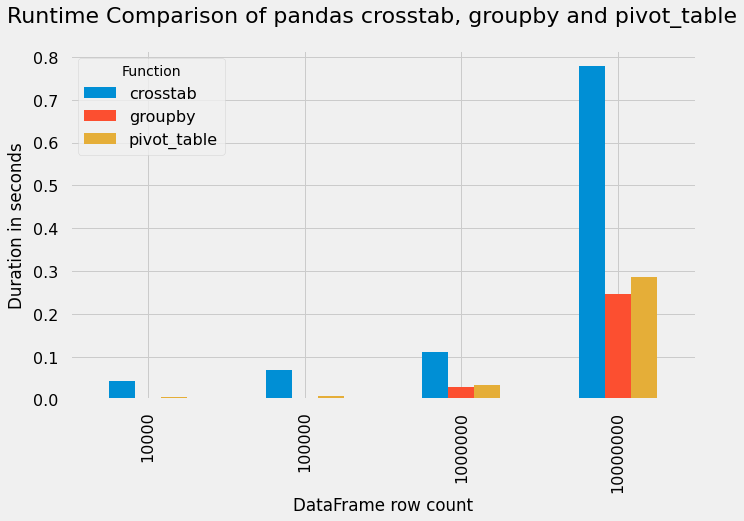

In [21]:
import timeit
from collections import defaultdict


def crosstab(df):
    pd.crosstab(index=df.A, columns=df.B)


def groupby(df):
    (
        df
        .groupby(['A', 'B'])
        ['C']
        .count()
        .unstack(fill_value=0)
    )


def pivot_table(df):
    (
        df
        .pivot_table(values='C',
                     index='A',
                     columns='B',
                     aggfunc='count',
                     fill_value=0)
    )


funcs = [crosstab, groupby, pivot_table]
measurements = []
repetitions = 5

# Use a seed distinct from above to prevent caching
np.random.seed(420)

for size in np.logspace(start=4, stop=7, num=4):
    size = int(size)
    data = np.random.randint(1, 100, size=(size, 10))
    df = pd.DataFrame(data, columns=cols)

    for func in funcs:
        duration = timeit.timeit('func(df)', number=repetitions, globals=globals()) / repetitions
        measurements.append({'Function': func.__name__, 'Row count': size, 'duration': duration})
        

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))
(
    pd.DataFrame(measurements)
    .groupby(['Row count', 'Function'])
    .duration
    .mean()
    .unstack()
    .plot(ax=ax, kind='bar')
)

ax.set_xlabel('DataFrame row count')
ax.set_ylabel('Duration in seconds', labelpad=25, va='top')

fig.suptitle('Runtime Comparison of pandas crosstab, groupby and pivot_table', fontsize=22)

### Tidsserier `.resample`


In [22]:
import pandas_datareader as pdr
# Request data via Yahoo public API
data = pdr.get_data_yahoo('NVDA')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-25,35.007500,34.110001,35.000000,34.564999,60822800.0,34.188549
2017-05-26,36.320000,34.277500,34.482498,35.459999,77914000.0,35.073795
2017-05-30,36.572498,35.762501,35.924999,36.217499,98965200.0,35.823055
2017-05-31,36.750000,35.512501,36.672501,36.087502,88731600.0,35.694466
2017-06-01,36.257500,35.630001,36.247501,36.090000,50334000.0,35.696945


In [23]:
(
    data
    .loc[:, ['Close']]
    .resample('W')
    .sum()
)

,Close
Date,
2017-05-28,70.024998
2017-06-04,144.305000
2017-06-11,188.502499
2017-06-18,189.269997
2017-06-25,196.520000
...,...
2022-05-01,954.340012
2022-05-08,969.880005
2022-05-15,850.559998


## Melting, Transposing, and Stacking Data

Data kan organiseret mange måde, men to centrale måder er **wide** og **long**. Dog kan der være fordele og ulemper ved at have data i en af de respektive formater. For mit eget vedkommende kan jeg bedst lide long format til at lave analyser og plots. 


| Metode | Beskrivelse |
| --- | --- |
| .melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True) | Returner en unpivoted dataframe. |
|.reset_index(level=None, drop=False,col_level=0, col_fill='')|Returner et nyt index level|
|.pivot_table(values=None, index=None,columns=None, aggfunc='mean',fill_value=None, margins=False,margins_name='All', dropna=True,observed=False, sort=True)|Laver en pivot table. `Index` laver index indgangen. `columns` til kolonne indgangen. `aggfunc` angiver en dictornary til enkelte eller flere aggregertion funktioner.`fill_value` udfylder missing værdier. `margins` til at vise subtotaler.|

In [24]:
import numpy     as np
import pandas as pd

scores = pd.DataFrame({
'name':['Adam', 'Bob', 'Dave', 'Fred'], 
'age': [15, 16, 16, 15],
'test1': [95, 81, 89, None],
'test2': [80, 82, 84, 88],
'teacher': ['Ashby', 'Ashby', 'Jones', 'Jones']})



In [25]:
scores.head()

,name,age,test1,test2,teacher
0,Adam,15,95.0,80,Ashby
1,Bob,16,81.0,82,Ashby
2,Dave,16,89.0,84,Jones
3,Fred,15,NaN,88,Jones


### Melting

Med `Melt` kan vi gå fra wide til long format. 

In [26]:
(
    scores
    .melt(
        id_vars=['name', 'age'],
        value_vars=['test1', 'test2'],
        var_name='test', 
        value_name='score'
    )
)

,name,age,test,score
0,Adam,15,test1,95.0
1,Bob,16,test1,81.0
2,Dave,16,test1,89.0
3,Fred,15,test1,NaN
4,Adam,15,test2,80.0
5,Bob,16,test2,82.0
6,Dave,16,test2,84.0
7,Fred,15,test2,88.0


Hvis vi skulle gøre det uden melt funktionen:

In [27]:
(
scores
.groupby(['name', 'age']) 
.apply(lambda g: pd.concat([
    g[['test1']]
    .rename(columns = {'test1':'val'})
    .assign(var='test1'),
    g[['test2']]
    .rename(columns = {'test2':'val'})
    .assign(var='test2')])) 
.reset_index()
.drop(columns='level_2')
)

,name,age,val,var
0,Adam,15,95.0,test1
1,Adam,15,80.0,test2
2,Bob,16,81.0,test1
3,Bob,16,82.0,test2
4,Dave,16,89.0,test1
5,Dave,16,84.0,test2
6,Fred,15,NaN,test1
7,Fred,15,88.0,test2



Vores data står i long format men lad os konvertere det lidt frem og tilbage.

### Un melting

In [28]:
melted = (
    scores
    .melt(
        id_vars=['name', 'age', 'teacher'],
        value_vars=['test1', 'test2'],
        var_name='test', 
        value_name='score'
    )
)
melted.head()

,name,age,teacher,test,score
0,Adam,15,Ashby,test1,95.0
1,Bob,16,Ashby,test1,81.0
2,Dave,16,Jones,test1,89.0
3,Fred,15,Jones,test1,NaN
4,Adam,15,Ashby,test2,80.0


In [29]:
(
    melted
    .pivot_table(
        index = ['name', 'age', 'teacher'],
        columns='test',
        values='score'
    )
    .reset_index()
)

test,name,age,teacher,test1,test2
0,Adam,15,Ashby,95.0,80.0
1,Bob,16,Ashby,81.0,82.0
2,Dave,16,Jones,89.0,84.0
3,Fred,15,Jones,NaN,88.0


In [30]:
(
    melted
    .groupby(['name', 'age', 'teacher', 'test'])
    .score
    .mean()
    .unstack()
    .reset_index()
)

test,name,age,teacher,test1,test2
0,Adam,15,Ashby,95.0,80.0
1,Bob,16,Ashby,81.0,82.0
2,Dave,16,Jones,89.0,84.0
3,Fred,15,Jones,NaN,88.0
